<a href="https://colab.research.google.com/github/yakaHan/Tugas/blob/main/Tugas_Analisis_Dataset_Wine_Quality_%26_Nyata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TUGAS MODULE 5 BIGDATA FUNDAMENTAL


### Isikan data diri
*   Nama : Muhamad Prayoga Ardana
*   Nim : 23.01.5044

##Tugas 1:  Analisis Dataset Wine Quality
Gunakan dataset wine quality untuk melakukan EDA tingkat lanjut:
1. Lakukan uji korelasi Spearman untuk memeriksa hubungan antara fitur-fitur kimia dan
kualitas anggur.
2. Deteksi outlier dalam kolom residual sugar menggunakan metode IQR.
3. Tambahkan fitur baru untuk mengklasifikasikan anggur berdasarkan kualitas (misalnya
"High", "Medium", "Low").
4. Buat visualisasi interaktif untuk menunjukkan distribusi kualitas anggur berdasarkan
jenis (red atau white).

In [ ]:
# Import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import spearmanr

In [ ]:
# Load dataset
df = pd.read_csv('/content/WineQT.csv')

In [ ]:
print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')


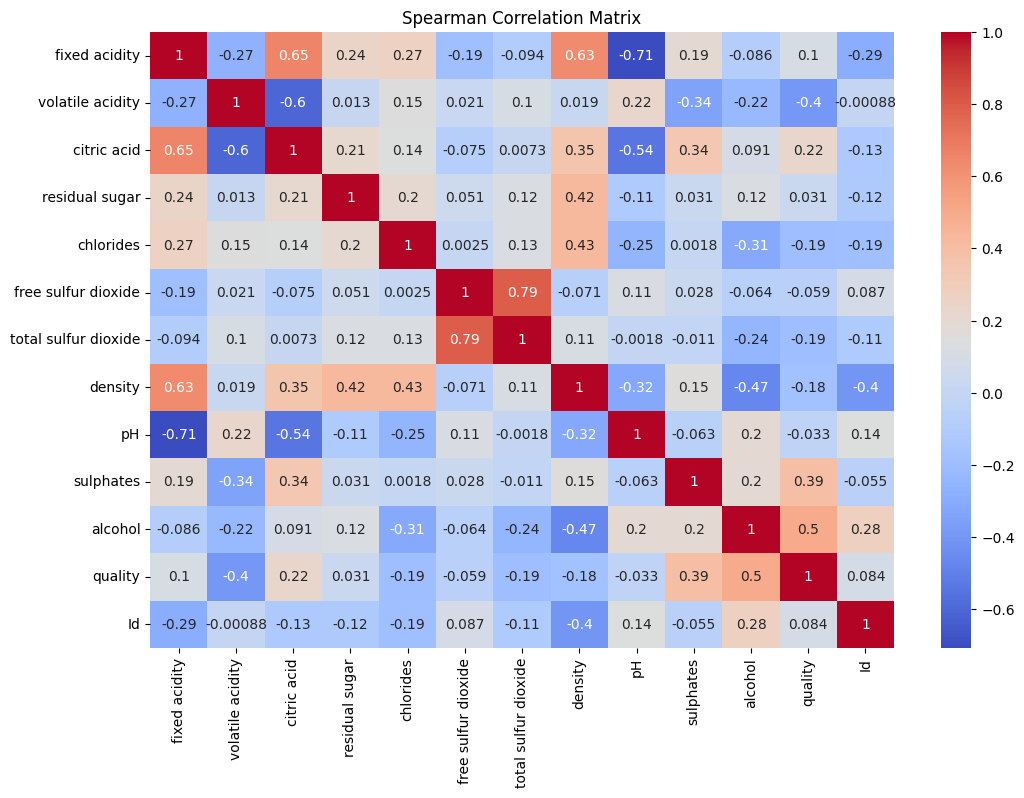

In [ ]:
# 1. Uji korelasi Spearman antara fitur kimia dan kualitas anggur
plt.figure(figsize=(12, 8))
spearman_corr = df.corr(method='spearman')
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Matrix')
plt.show()

In [ ]:
# 2. Deteksi outlier dalam kolom 'residual sugar' dengan metode IQR
Q1 = df['residual sugar'].quantile(0.25)
Q3 = df['residual sugar'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['residual sugar'] < Q1 - 1.5 * IQR) | (df['residual sugar'] > Q3 + 1.5 * IQR)]
print(f"Jumlah outlier pada 'residual sugar': {len(outliers)}")

Jumlah outlier pada 'residual sugar': 110


In [ ]:
# 3. Tambahkan fitur klasifikasi kualitas anggur
def quality_category(q):
    if q <= 4:
        return 'Low'
    elif q <= 6:
        return 'Medium'
    else:
        return 'High'

df['quality_label'] = df['quality'].apply(quality_category)

In [ ]:
# 4. Visualisasi interaktif distribusi kualitas anggur berdasarkan jenis (kolom 'type')
if 'type' in df.columns:
    fig = px.histogram(df, x='quality_label', color='type', barmode='group',
                       title='Distribusi Kualitas Anggur berdasarkan Jenis',
                       labels={'quality_label': 'Kualitas'})
else:
    fig = px.histogram(df, x='quality_label',
                       title='Distribusi Kualitas Anggur',
                       labels={'quality_label': 'Kualitas'})
fig.show()

##TUGAS 2 : Nyata
Cari dataset publik (misalnya dari Kaggle) dan lakukan EDA tingkat lanjut:
1. Gunakan teknik statistik inferensial untuk mendapatkan insight.
2. Deteksi dan tangani outlier dalam dataset.
3. Lakukan feature engineering untuk meningkatkan kualitas dataset.
4. Buat minimal 3 visualisasi interaktif yang relevan.
5. Tuliskan kesimpulan atau insight yang Anda temukan dari dataset tersebut.

In [ ]:
# Import library yang diperlukan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Load dataset
df = pd.read_csv('/content/train.csv')

In [ ]:
# 1. Eksplorasi Data
print("Informasi Dataset:")
print(df.info())
print("\nStatistik Deskriptif:")
print(df.describe())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Statistik Deskriptif:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118   

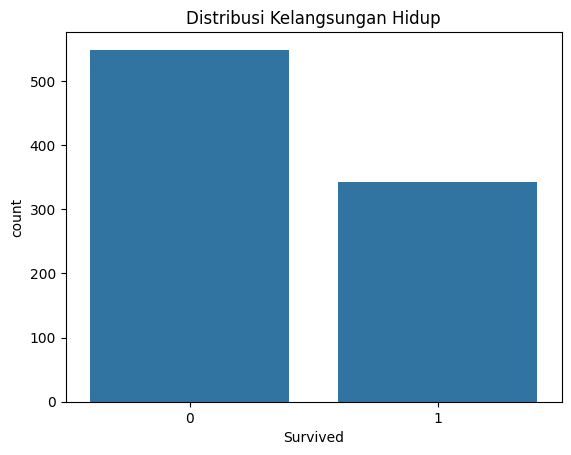

In [ ]:
# Visualisasi distribusi kelangsungan hidup
sns.countplot(x='Survived', data=df)
plt.title('Distribusi Kelangsungan Hidup')
plt.show()

In [ ]:
# 2. Praproses Data
# Mengisi nilai yang hilang
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-13-dac2dc54b6ae>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-13-dac2dc54b6ae>:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

In [ ]:
# Menghapus kolom yang tidak diperlukan
df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)

In [ ]:
# Encoding variabel kategorikal
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [ ]:
# 3. Membagi data menjadi fitur dan target
X = df.drop('Survived', axis=1)
y = df['Survived']

In [ ]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 4. Membangun dan melatih model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# 5. Evaluasi Model
y_pred = model.predict(X_test)
print("\nMatriks Kebingungan:")
print(confusion_matrix(y_test, y_pred))
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))


Matriks Kebingungan:
[[92 13]
 [19 55]]

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

